#TRAINING CLEANING DATA TITANIC DATASET

PREDICTING THE SURVIVAL OF PASSANGERS

In [3]:
#Load in some packages
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import os

In [4]:
#load in the dataset
df = pd.read_csv(r"C:\Users\myloc\Downloads\train.csv")

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.describe()
#numeric columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Identify categorical columns
categorical = df.dtypes[df.dtypes == "object"].index

# Print the names of categorical columns
print(categorical)

# Describe the categorical columns
df[categorical].describe()


Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [11]:
#removing unneccesary columns
del df["PassengerId"]

In [15]:
#considering to remove the name column as it has no impact on the survival of the passanger
sorted(df["Name"])[0:15]

['Abbing, Mr. Anthony',
 'Abbott, Mr. Rossmore Edward',
 'Abbott, Mrs. Stanton (Rosa Hunt)',
 'Abelson, Mr. Samuel',
 'Abelson, Mrs. Samuel (Hannah Wizosky)',
 'Adahl, Mr. Mauritz Nils Martin',
 'Adams, Mr. John',
 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
 'Aks, Mrs. Sam (Leah Rosen)',
 'Albimona, Mr. Nassef Cassem',
 'Alexander, Mr. William',
 'Alhomaki, Mr. Ilmari Rudolf',
 'Ali, Mr. Ahmed',
 'Ali, Mr. William',
 'Allen, Miss. Elisabeth Walton']

In [19]:
df["Name"].describe()

count                         891
unique                        891
top       Braund, Mr. Owen Harris
freq                            1
Name: Name, dtype: object

In [21]:
df["Ticket"][0:10]

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [23]:
df["Ticket"].describe()

count        891
unique       681
top       347082
freq           7
Name: Ticket, dtype: object

In [27]:
del df["Ticket"]

In [29]:
df["Cabin"][0:10]

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [31]:
df["Cabin"].describe()
#due to different values we keep this column

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [33]:
# cahnging the datatype from int to catrgorical since it has indicataor variables where 0=absence and 1=presence
new_Survived = pd.Categorical(df["Survived"])
#renaming the categories
new_Survived = new_Survived.rename_categories(["Died", "Survived"])
new_Survived.describe()


,counts,freqs
categories,,
Died,549,0.616162
Survived,342,0.383838


In [35]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C


In [37]:
#transforming Pclass into an ordered categorical variable

new_Pclass = pd.Categorical(df["Pclass"], ordered=True)

new_Pclass= new_Pclass.rename_categories(["Class1", "Class2", "Class3"])

new_Pclass.describe()
                                        

,counts,freqs
categories,,
Class1,216,0.242424
Class2,184,0.206510
Class3,491,0.551066


In [39]:
df["Pclass"] = new_Pclass

In [41]:
df["Cabin"].unique

<bound method Series.unique of 0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object>

In [43]:
char_cabin = df["Cabin"].astype(str)

# Extract the first letter from each value in the Cabin column
new_Cabin = np.array([cabin[0] for cabin in char_cabin])

# Convert the extracted letters into a categorical variable
new_Cabin = pd.Categorical(new_Cabin)

# Assign the new_Cabin back to the DataFrame if needed
df['Cabin_Letter'] = new_Cabin

# Get a summary of the new categorical data
new_Cabin.describe()

,counts,freqs
categories,,
A,15,0.016835
B,47,0.052750
C,59,0.066218
D,33,0.037037
E,32,0.035915
F,13,0.014590
G,4,0.004489
T,1,0.001122
n,687,0.771044


In [45]:
dummy_vector = pd.Series([1,None,3,7,8])

dummy_vector.isnull()

0    False
1     True
2    False
3    False
4    False
dtype: bool

In [47]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [49]:
 missing = np.where(df["Age"].isnull() == True)
 missing
#shows all indice of missing values

(array([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,  45,  46,  47,
         48,  55,  64,  65,  76,  77,  82,  87,  95, 101, 107, 109, 121,
        126, 128, 140, 154, 158, 159, 166, 168, 176, 180, 181, 185, 186,
        196, 198, 201, 214, 223, 229, 235, 240, 241, 250, 256, 260, 264,
        270, 274, 277, 284, 295, 298, 300, 301, 303, 304, 306, 324, 330,
        334, 335, 347, 351, 354, 358, 359, 364, 367, 368, 375, 384, 388,
        409, 410, 411, 413, 415, 420, 425, 428, 431, 444, 451, 454, 457,
        459, 464, 466, 468, 470, 475, 481, 485, 490, 495, 497, 502, 507,
        511, 517, 522, 524, 527, 531, 533, 538, 547, 552, 557, 560, 563,
        564, 568, 573, 578, 584, 589, 593, 596, 598, 601, 602, 611, 612,
        613, 629, 633, 639, 643, 648, 650, 653, 656, 667, 669, 674, 680,
        692, 697, 709, 711, 718, 727, 732, 738, 739, 740, 760, 766, 768,
        773, 776, 778, 783, 790, 792, 793, 815, 825, 826, 828, 832, 837,
        839, 846, 849, 859, 863, 868, 878, 888], dt

In [51]:
#counting the number of missing values
len(missing[0])

177

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

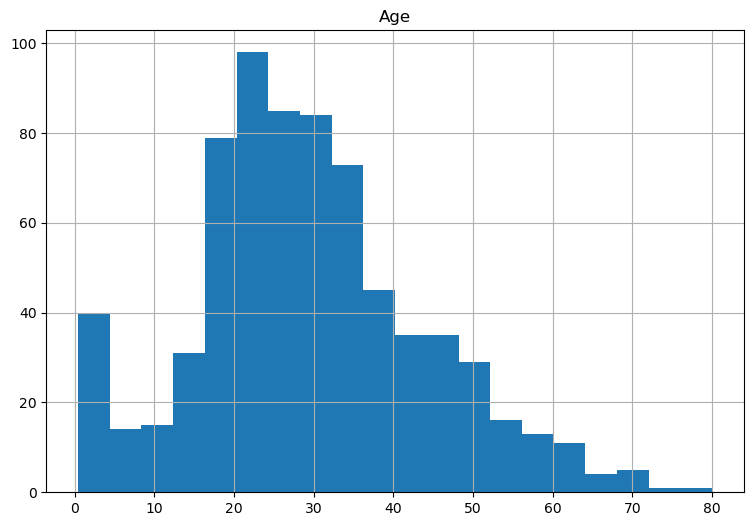

In [53]:
df.hist(column='Age', figsize=(9,6), bins=20)
#column to plot
#plot size
#number of histogram bins

In [54]:
new_age_var = np.where(df["Age"].isnull(), 28, df["Age"])
#28=median
#logical check
#value if check is true
#value if check is false
df["Age"] = new_age_var

df["Age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

array([[<Axes: title={'center': 'Age'}>]], dtype=object)

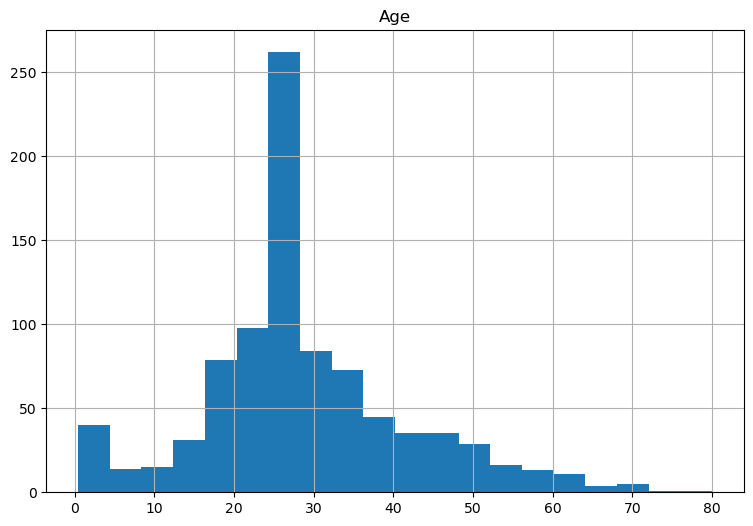

In [55]:
df.hist(column='Age', figsize=(9,6), bins=20)
#rerun our histogram

<Axes: >

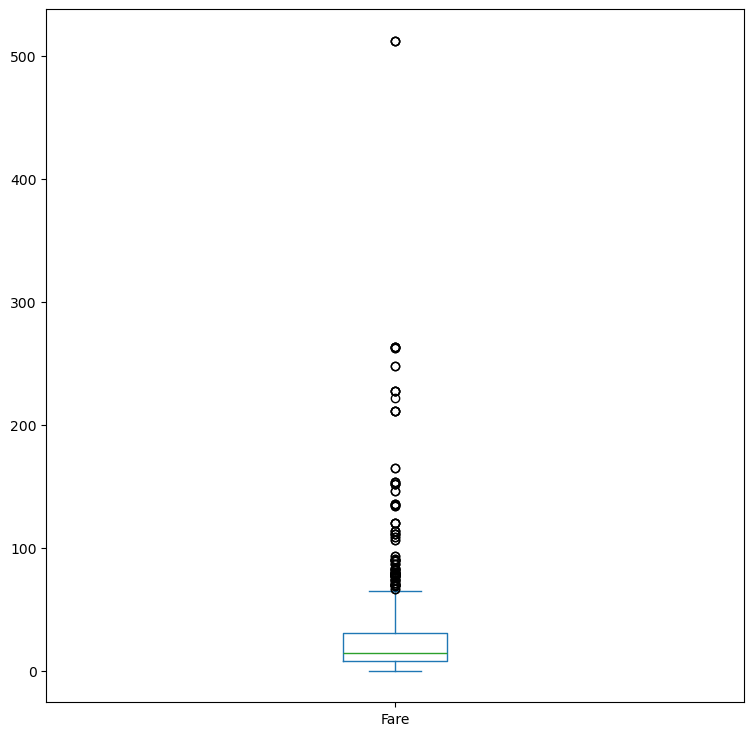

In [58]:
df["Fare"].plot(kind="box", figsize=(9,9))
#greenline median
#blue box middle 50% of values

In [61]:
index = np.where(df["Fare"] == max(df["Fare"]))
df.loc[index]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_Letter
258,1,Class1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,NaN,C,n
679,1,Class1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,B51 B53 B55,C,B
737,1,Class1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,B101,C,B


In [63]:
#feature engineering = adding new variables

In [65]:
df["Family"] = df["SibSp"] + df["Parch"]
#creating a new column by adding 2 existing marching columns

In [67]:
most_family = np.where(df["Family"] == max(df["Family"]))
df.loc[most_family]
#There were 7 people on board with 8 siblings/spouses and 2 parents/children--they were probably all siblings of one another. 
#Tragically, all 7 of them passed away. The 8th sibling is likely in the test data for which we are supposed make predictions.

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_Letter,Family
159,0,Class3,"Sage, Master. Thomas Henry",male,28.0,8,2,69.55,NaN,S,n,10
180,0,Class3,"Sage, Miss. Constance Gladys",female,28.0,8,2,69.55,NaN,S,n,10
201,0,Class3,"Sage, Mr. Frederick",male,28.0,8,2,69.55,NaN,S,n,10
324,0,Class3,"Sage, Mr. George John Jr",male,28.0,8,2,69.55,NaN,S,n,10
792,0,Class3,"Sage, Miss. Stella Anna",female,28.0,8,2,69.55,NaN,S,n,10
846,0,Class3,"Sage, Mr. Douglas Bullen",male,28.0,8,2,69.55,NaN,S,n,10
863,0,Class3,"Sage, Miss. Dorothy Edith ""Dolly""",female,28.0,8,2,69.55,NaN,S,n,10


In [69]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_Letter,Family
0,0,Class3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,n,1
1,1,Class1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,C,1
2,1,Class3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,n,0
3,1,Class1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,C,1
4,0,Class3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,n,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,Class2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S,n,0
887,1,Class1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,B42,S,B,0
888,0,Class3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,NaN,S,n,3
889,1,Class1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C148,C,C,0
